<a href="https://colab.research.google.com/github/Prescilliaogbude/iphone_review_analysis/blob/main/iphone_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycountry
!pip install geopy
!pip install textblob
!pip install pyLDAvis
from geopy.geocoders import Nominatim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from gensim import corpora, models
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

plt.style.use('ggplot')

data_frame = pd.read_csv("/content/iphone.csv")
data_frame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.4 MB/s eta 0:00:00


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [ ]:
df = data_frame
df

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
...,...,...,...,...,...,...,...,...,...,...,...
3057,B09G9D8KRQ,India,11-10-2023,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3058,B09G9D8KRQ,India,14-10-2022,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3059,B09G9D8KRQ,India,24-02-2022,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N
3060,B09G9D8KRQ,India,16-10-2023,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   productAsin        3062 non-null   object        
 1   country            3062 non-null   object        
 2   date               3062 non-null   datetime64[ns]
 3   isVerified         3062 non-null   bool          
 4   ratingScore        3062 non-null   int64         
 5   reviewTitle        3062 non-null   object        
 6   reviewDescription  2976 non-null   object        
 7   reviewUrl          3046 non-null   object        
 8   reviewedIn         3062 non-null   object        
 9   variant            3062 non-null   object        
 10  variantAsin        3062 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(8)
memory usage: 242.3+ KB


In [ ]:
df['reviewDescription'].values[1]

'It look so fabulous, I am android user switched to apple, performance wise iPhone is more better than android due to A15 Bionic chip. I feel pleasant while using iPhone in hand. I like it very much 😍❤️'

In [ ]:
print(df.shape)

(3062, 11)


In [ ]:
rating_score = df['ratingScore'].value_counts().sort_index()
rating_score

,count
ratingScore,
1,587
2,171
3,239
4,461
5,1604


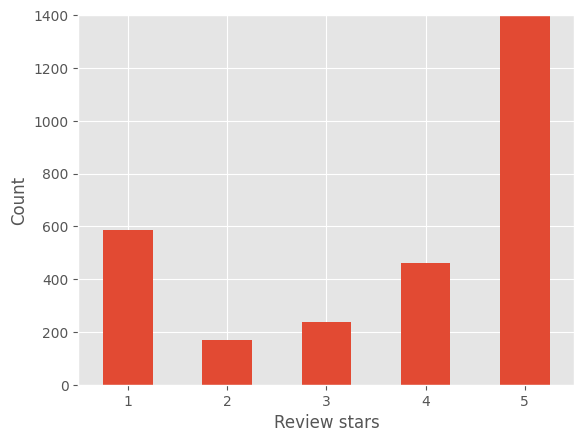

In [ ]:
rating_score.plot(kind='bar')
plt.xticks(rotation=0)
figsize=(10,5)
plt.xlabel('Review stars')
plt.ylabel('Count')
plt.ylim(0, 1400)
plt.show()

In [ ]:
df['reviewDescription'] = df['reviewDescription'].astype(str).str.lower()
df = df.dropna(subset=['reviewDescription'])

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
df['sentiment'] = df['reviewDescription'].apply(get_sentiment)
df['sentiment']

,sentiment
0,positive
1,positive
2,negative
3,positive
4,positive
...,...
3057,negative
3058,negative
3059,positive
3060,positive


In [ ]:
print(df[['ratingScore', 'sentiment', 'reviewDescription']])


      ratingScore sentiment                                  reviewDescription
0               4  positive  every thing is good about iphones, there's not...
1               5  positive  it look so fabulous, i am android user switche...
2               4  negative  i tried to flip camera while recording but no ...
3               5  positive                                       100% genuine
4               5  positive         happy to get the iphone 13 in amazon offer
...           ...       ...                                                ...
3057            1  negative  useless phon never buy this heat n useless cam...
3058            2  negative  iam not happy with this product why because ch...
3059            3  positive                                         good phone
3060            1  positive  while charging mobile it's getting so hot even...
3061            1  negative  battery power is be very bad need to chat on d...

[3062 rows x 3 columns]


In [ ]:
print("\nSentiment Counts:")
print(df['sentiment'].value_counts())


Sentiment Counts:
sentiment
positive    2099
neutral      567
negative     396
Name: count, dtype: int64


In [ ]:
df['sentiment_polarity'] = df['reviewDescription'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['sentiment_polarity']

,sentiment_polarity
0,0.183929
1,0.424048
2,-0.088333
3,0.400000
4,0.800000
...,...
3057,-0.300000
3058,-0.200000
3059,0.700000
3060,0.225000


In [ ]:
Sentiment_over_time = df.groupby('date')['sentiment_polarity'].mean().reset_index()
Sentiment_over_time

,date,sentiment_polarity
0,2021-09-24,0.000000
1,2021-09-25,0.183912
2,2021-09-26,0.158333
3,2021-09-28,0.462509
4,2021-09-29,0.000000
...,...,...
784,2024-09-15,0.063612
785,2024-09-16,0.332292
786,2024-09-17,0.114141
787,2024-09-18,0.517730


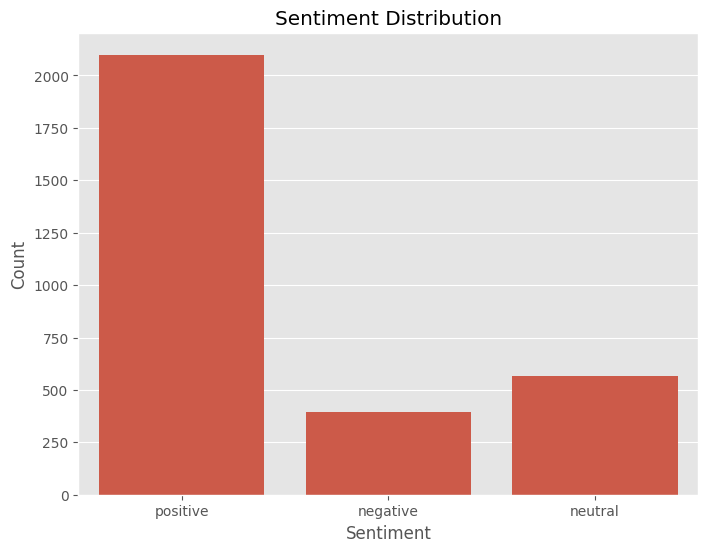

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

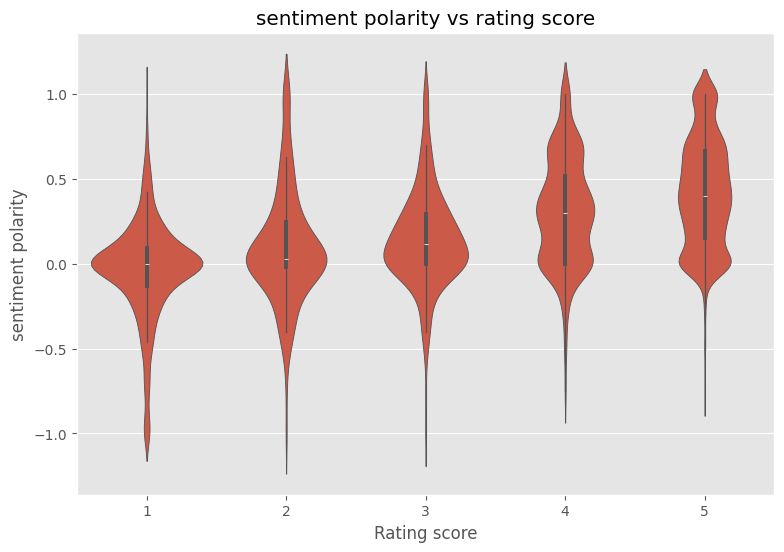

In [ ]:
plt.figure(figsize=(9, 6))
sns.violinplot(x='ratingScore', y='sentiment_polarity', data=df)
plt.title('sentiment polarity vs rating score')
plt.xlabel('Rating score')
plt.ylabel('sentiment polarity')
plt.show()

In [ ]:
df_country = df['country'].value_counts().reset_index()
df_country.columns = ['country', 'count']
df_country

,country,count
0,India,2229
1,United States,579
2,Japan,158
3,United Arab Emirates,80
4,Mexico,11
5,Canada,4
6,Egypt,1


In [ ]:
def count_feature_mentions(reviews, feature):
    count = 0
    for review in reviews:
        if feature in review.lower():
            count += 1
    return count

In [ ]:
reviews = df['reviewDescription'].tolist()

In [ ]:
print(f"Mentions of 'camera': {count_feature_mentions(reviews, 'camera')}")
print(f"Mentions of 'battery': {count_feature_mentions(reviews, 'battery')}")
print(f"Mentions of 'display': {count_feature_mentions(reviews, 'screen')}")
print(f"Mentions of 'performance': {count_feature_mentions(reviews, 'storage')}")
print(f"Mentions of 'price': {count_feature_mentions(reviews, 'price')}")




Mentions of 'camera': 510
Mentions of 'battery': 600
Mentions of 'display': 202
Mentions of 'performance': 24
Mentions of 'price': 206


In [ ]:
def analyze_feature_sentiment(df, feature):
    feature_mentions = df[df[f'{feature}_mentioned'] == True]
    sentiment_counts = feature_mentions['sentiment'].value_counts()
    return sentiment_counts

In [ ]:
features = ['camera', 'battery', 'display', 'performance', 'price']
for feature in features:
    df[f'{feature}_mentioned'] = df['reviewDescription'].str.lower().str.contains(feature)

In [ ]:
camera_sentiment = analyze_feature_sentiment(df, 'camera')
battery_sentiment = analyze_feature_sentiment(df, 'battery')
display_sentiment = analyze_feature_sentiment(df, 'display')
performance_sentiment = analyze_feature_sentiment(df, 'performance')
price_sentiment = analyze_feature_sentiment(df, 'price')

In [ ]:
print("Camera Sentiment:\n", camera_sentiment)
print("\nBattery Sentiment:\n", battery_sentiment)
print("\nDisplay Sentiment:\n", display_sentiment)
print("\nPerformance Sentiment:\n", performance_sentiment)
print("\nPrice Sentiment:\n", price_sentiment)

Camera Sentiment:
 sentiment
positive    427
negative     55
neutral      28
Name: count, dtype: int64

Battery Sentiment:
 sentiment
positive    491
negative     67
neutral      42
Name: count, dtype: int64

Display Sentiment:
 sentiment
positive    159
negative     13
neutral       8
Name: count, dtype: int64

Performance Sentiment:
 sentiment
positive    155
negative     18
neutral       3
Name: count, dtype: int64

Price Sentiment:
 sentiment
positive    183
negative     17
neutral       6
Name: count, dtype: int64


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['combined_review'] = df['reviewTitle'].fillna('') + ' ' + df['reviewDescription'].fillna('') + ' ' + df['reviewUrl'].fillna('')

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return tokens

In [ ]:
df['processed_review'] = df['combined_review'].apply(preprocess_text)

In [ ]:
documents = df['processed_review']
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


In [ ]:
num_topics = 5
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [ ]:
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.041*"iphone" + 0.023*"13" + 0.008*"camera" + 0.007*"performance" + 0.007*"feature" + 0.007*"experience" + 0.006*"display" + 0.006*"device" + 0.006*"design" + 0.005*"user"')
(1, '0.022*"good" + 0.014*"battery" + 0.014*"phone" + 0.014*"iphone" + 0.009*"buy" + 0.008*"best" + 0.007*"camera" + 0.007*"13" + 0.007*"also" + 0.007*"issue"')
(2, '0.023*"good" + 0.017*"product" + 0.015*"android" + 0.013*"battery" + 0.013*"iphone" + 0.011*"phone" + 0.011*"quality" + 0.009*"camera" + 0.008*"apple" + 0.006*"excellent"')
(3, '0.084*"\u200e" + 0.028*"phone" + 0.018*"good" + 0.015*"iphone" + 0.014*"battery" + 0.013*"camera" + 0.011*"best" + 0.011*"great" + 0.008*"issue" + 0.007*"android"')
(4, '0.043*"phone" + 0.016*"good" + 0.015*"product" + 0.014*"iphone" + 0.012*"amazon" + 0.010*"apple" + 0.008*"great" + 0.008*"camera" + 0.008*"battery" + 0.008*"new"')


In [ ]:
prepared_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)


In [ ]:
pyLDAvis.display(prepared_data)